In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import curve_fit
from utils import *

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [22]:
df = pd.read_csv('data/Hot.csv')
df = convert_time_to_seconds(df, 'Time')
df.head()

,Time,Voltage_0 (Collected),Voltage_1 (Collected),Temperature_0 (Collected)
0,0.000,0.726357,2.359182,21.961545
1,0.001,0.729863,2.360447,21.961545
2,0.002,0.738469,2.364557,21.961545
3,0.003,0.740063,2.365506,21.961545
4,0.004,0.726357,2.360130,21.961545


In [23]:
# calibrate IC Sensor
calibration_df = df[(df['Time'] >= 2) & (df['Time'] <= 10)]
ic_coeff = get_IC_coefficents(calibration_df)

ic_coeff_h2a = [ 23.13923163, -31.00751685]
print('ic_coeff:', ic_coeff)

df['Temperature_2 (IC Sensor)'] = get_IC_temperatures(df, ic_coeff_h2a)

ic_coeff: [ 28.61001534 -50.26829149]


In [24]:
# Calibrate Thermistor
calibration_df = df[(df['Temperature_0 (Collected)'] >= 20) & (df['Temperature_0 (Collected)'] <= 60)]
coeff1 = get_steinhart_hart_coefficents(calibration_df)
coeff1 = [ 0.0262222,  -0.08212696,  0.09546998] # from h2a
print('Thermistor Coefficents',coeff1)
df['Temperature_1 (Thermistor)'] = get_thermistor_temperatures(df,coeff1)

Thermistor Coefficents [0.0262222, -0.08212696, 0.09546998]


Text(0.5, 1.0, 'Hot Water Cooling')

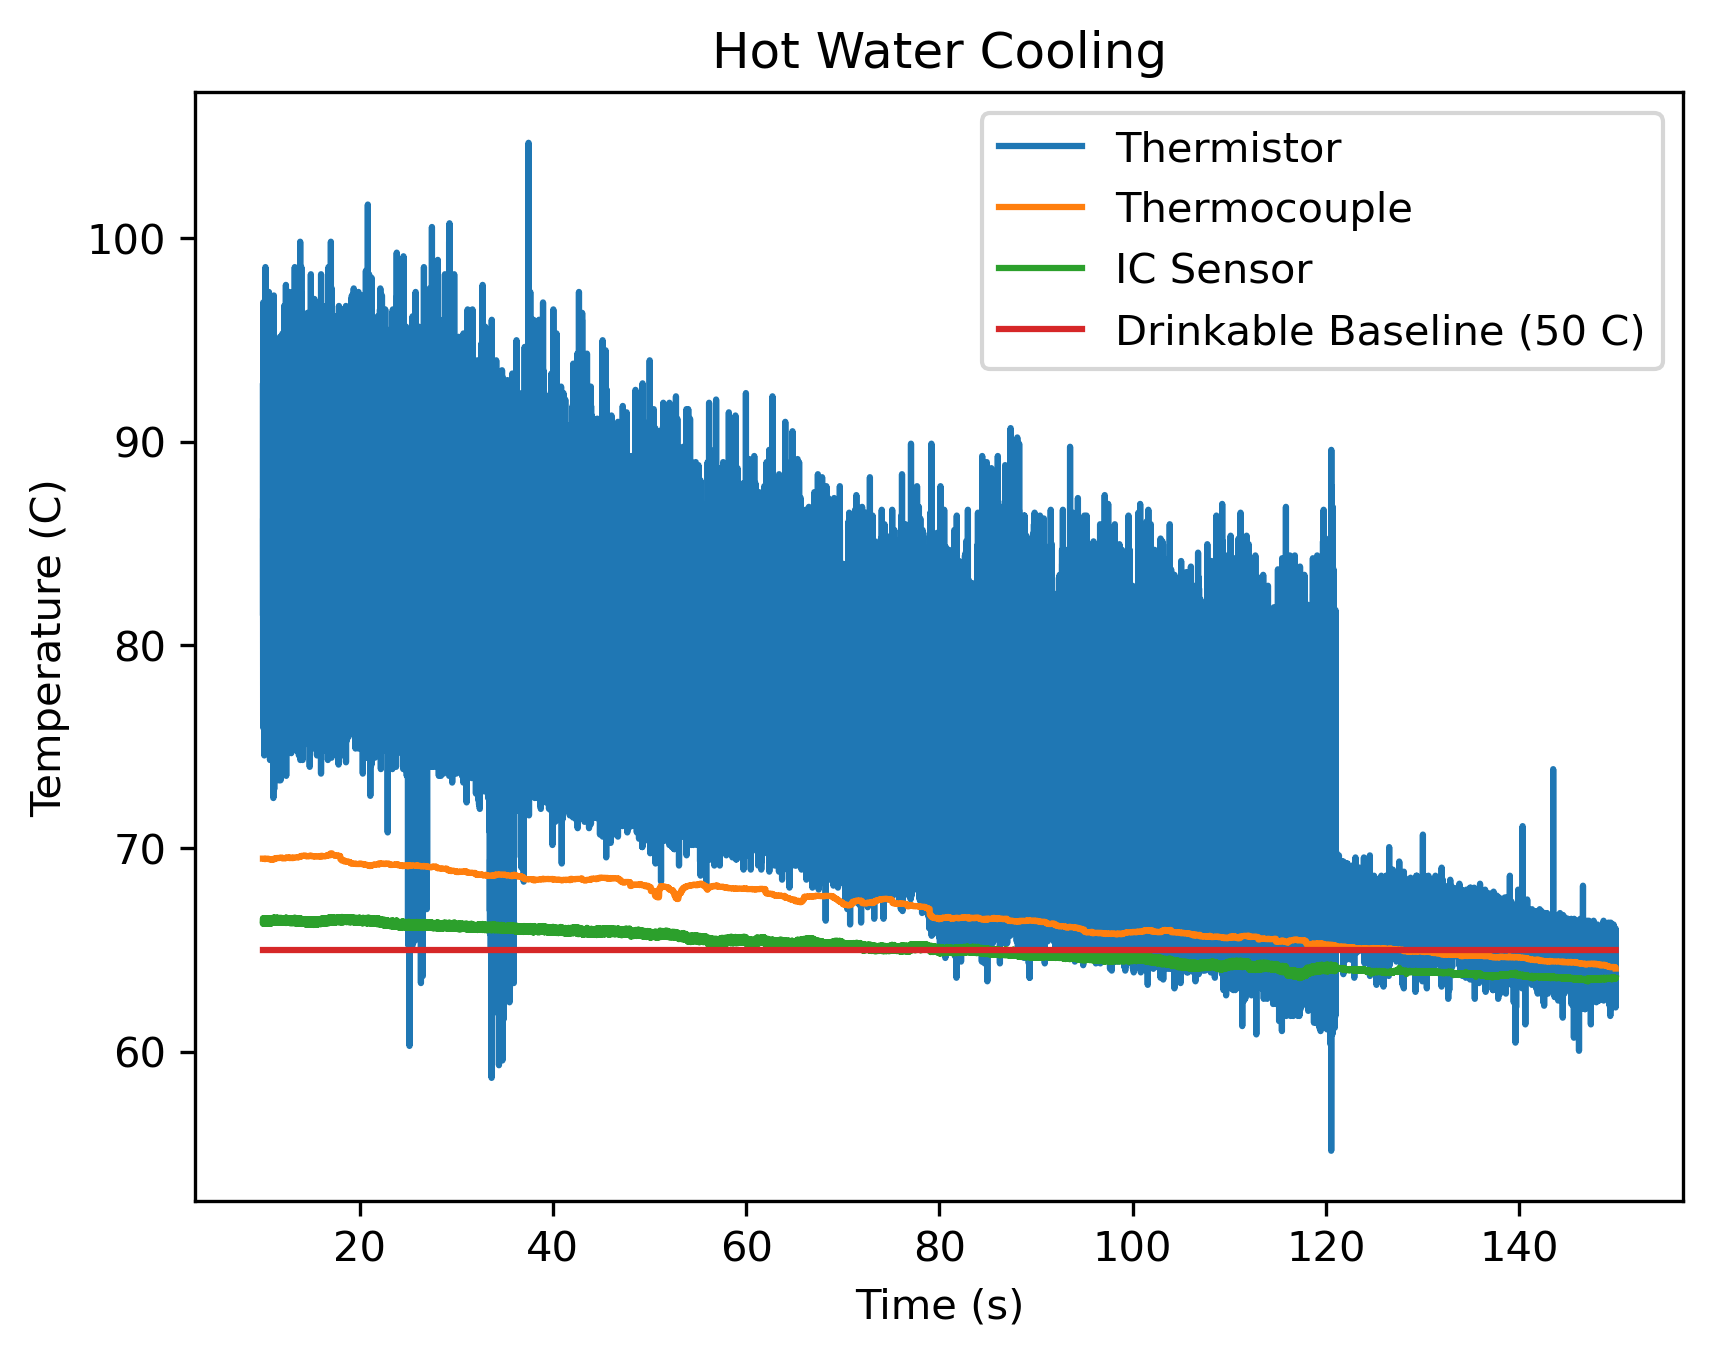

In [25]:
a2h_df = df[(df['Time'] >= 10) & (df['Time'] <= 150)]

plt.plot(a2h_df['Time'],a2h_df['Temperature_1 (Thermistor)'], label = 'Thermistor')
plt.plot(a2h_df['Time'],a2h_df['Temperature_0 (Collected)'], label = 'Thermocouple')
plt.plot(a2h_df['Time'],a2h_df['Temperature_2 (IC Sensor)'], label = 'IC Sensor')
plt.plot(a2h_df['Time'], [65]*len(a2h_df['Time']),label = 'Drinkable Baseline (65 C)')

plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.legend()
plt.title('Hot Water Cooling - All Sensors')

/var/folders/zz/st6fvfhd0c9bh81980z535dh0000gn/T/ipykernel_8936/2927860150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a2h_df['Average_Temperature'] = a2h_df[['Temperature_1 (Thermistor)', 'Temperature_0 (Collected)', 'Temperature_2 (IC Sensor)']].mean(axis=1).rolling(window=1000).mean()


<class 'pandas.core.frame.DataFrame'>


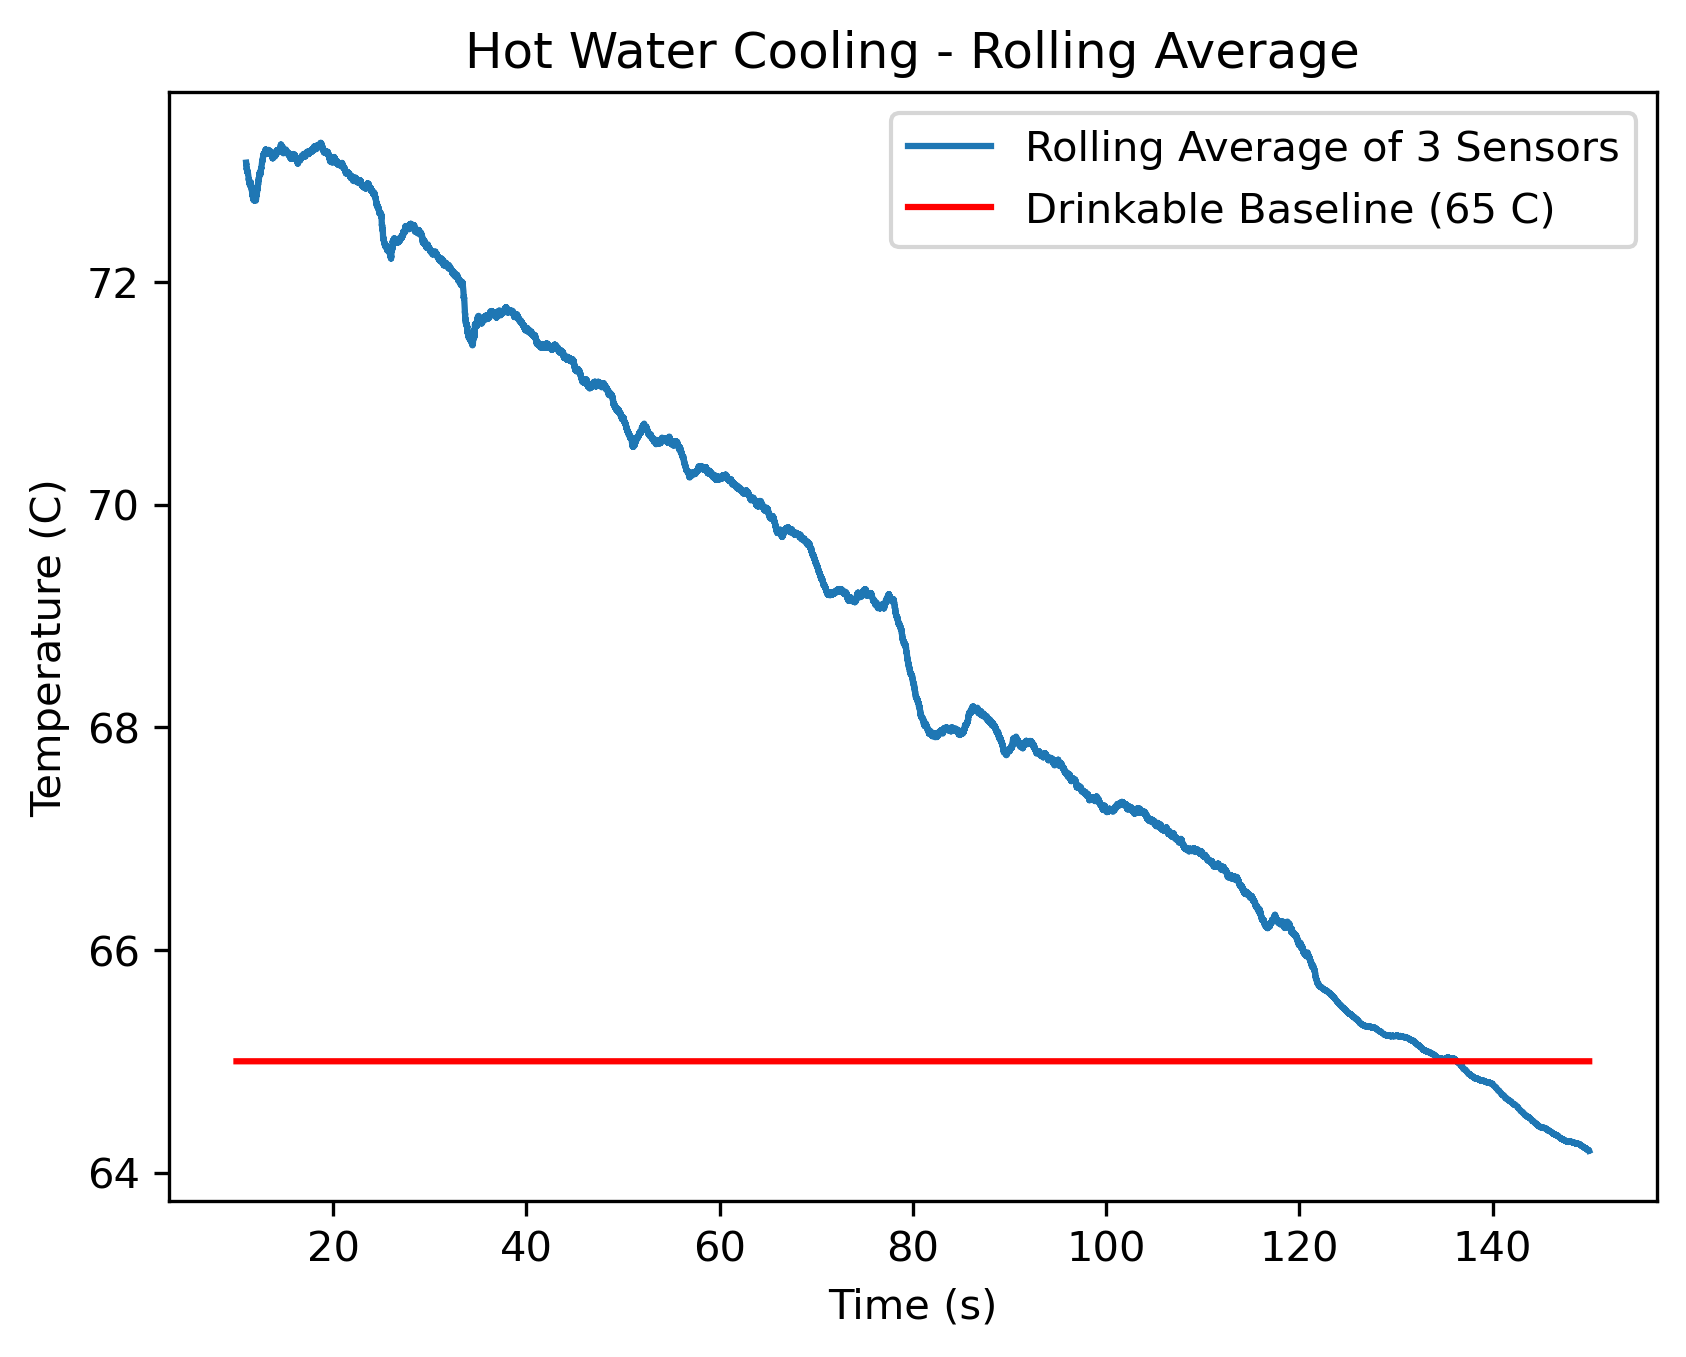

In [35]:
a2h_df['Average_Temperature'] = a2h_df[['Temperature_1 (Thermistor)', 'Temperature_0 (Collected)', 'Temperature_2 (IC Sensor)']].mean(axis=1).rolling(window=1000).mean()
plt.plot(a2h_df['Time'],a2h_df['Average_Temperature'], label = 'Rolling Average of 3 Sensors')
plt.plot(a2h_df['Time'], [65]*len(a2h_df['Time']),label = 'Drinkable Baseline (65 C)', color = 'red')

plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.legend()
plt.title('Hot Water Cooling - Rolling Average')

# get time when rolling average crosses drinkable base line
row = a2h_df[np.isclose(a2h_df['Average_Temperature'], 65.00, atol = .01)]
print(type(row))